In [1]:
import numpy as np
import pandas as pd

In [10]:
ds = pd.read_csv('../../data/starbucks.csv', index_col=0, parse_dates=True)

In [11]:
ds.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [13]:
ds.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

| DateOffset Class                    | Frequency String | Description                                          |
|-------------------------------------|------------------|------------------------------------------------------|
| `DateOffset`                        | None             | Generic offset class, defaults to absolute 24 hours |
| `BDay` or `BusinessDay`            | `'B'`            | Business day (weekday)                              |
| `CDay` or `CustomBusinessDay`      | `'C'`            | Custom business day                                 |
| `Week`                              | `'W'`            | One week, optionally anchored on a weekday          |
| `WeekOfMonth`                       | `'WOM'`          | The x-th day of the y-th week of each month         |
| `LastWeekOfMonth`                   | `'LWOM'`         | The x-th day of the last week of each month         |
| `MonthEnd`                          | `'ME'`           | Calendar month end                                  |
| `MonthBegin`                        | `'MS'`           | Calendar month begin                                |
| `BMonthEnd` or `BusinessMonthEnd`   | `'BME'`          | Business month end                                  |
| `BMonthBegin` or `BusinessMonthBegin` | `'BMS'`        | Business month begin                                |
| `CBMonthEnd` or `CustomBusinessMonthEnd` | `'CBME'`     | Custom business month end                           |
| `CBMonthBegin` or `CustomBusinessMonthBegin` | `'CBMS'` | Custom business month begin                         |
| `SemiMonthEnd`                      | `'SME'`          | 15th (or other day) and calendar month end          |
| `SemiMonthBegin`                    | `'SMS'`          | 15th (or other day) and calendar month begin        |
| `QuarterEnd`                        | `'QE'`           | Calendar quarter end                                |
| `QuarterBegin`                      | `'QS'`           | Calendar quarter begin                              |
| `BQuarterEnd`                       | `'BQE'`          | Business quarter end                                |
| `BQuarterBegin`                     | `'BQS'`          | Business quarter begin                              |
| `FY5253Quarter`                     | `'REQ'`          | Retail (52–53 week) quarter                         |
| `YearEnd`                           | `'YE'`           | Calendar year end                                   |
| `YearBegin`                         | `'YS'` or `'BYS'`| Calendar year begin                                 |
| `BYearEnd`                          | `'BYE'`          | Business year end                                   |
| `BYearBegin`                        | `'BYS'`          | Business year begin                                 |
| `FY5253`                            | `'RE'`           | Retail (52–53 week) year                            |
| `Easter`                            | None             | Easter holiday                                      |
| `BusinessHour`                      | `'bh'`           | Business hour                                       |
| `CustomBusinessHour`               | `'cbh'`          | Custom business hour                                |
| `Day`                               | `'D'`            | One absolute day                                    |
| `Hour`                              | `'h'`            | One hour                                            |
| `Minute`                            | `'min'`          | One minute                                          |
| `Second`                            | `'s'`            | One second                                          |
| `Milli`                             | `'ms'`           | One millisecond                                     |
| `Micro`                             | `'us'`           | One microsecond                                     |
| `Nano`                              | `'ns'`           | One nanosecond                                      |


In [18]:
# daily -> yearly
ds.resample(rule='YE').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [19]:
def first_day(entry):
    if len(entry):
        return entry[0]

In [20]:
ds.resample(rule='YE').apply(first_day)

C:\Users\c5m7b\AppData\Local\Temp\ipykernel_53564\710633468.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [21]:
ds

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


<Axes: xlabel='Date'>

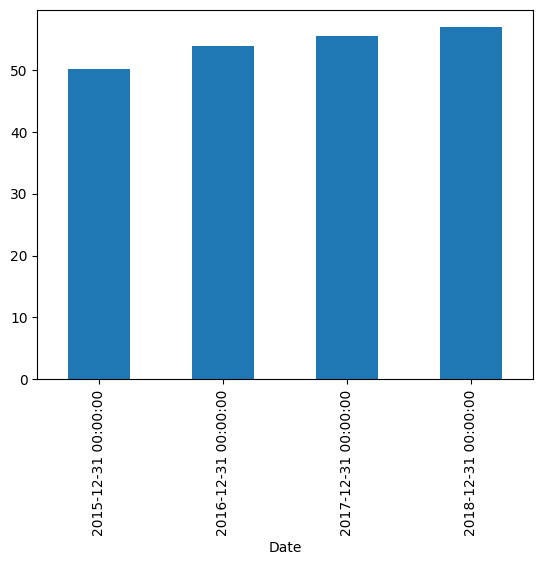

In [25]:
ds['Close'].resample('YE').mean().plot.bar()